In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
#sns.set()


In [246]:
data = pd.read_csv("load/USA_CA_Modesto.Muni.AP.724926_TMY3_BASE.csv")

In [247]:
data.head()


,Date/Time,Electricity:Facility [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly)
0,01/01 01:00:00,0.712377,2.894254,0,2.516708,0.0,0.069809,0.069809,0.069809,0.128562,0.026369,0.092943,0.379618,0.351395
1,01/01 02:00:00,0.607102,3.041735,0,2.737585,0.0,0.075936,0.075936,0.075936,0.074995,0.015382,0.076186,0.349528,0.280072
2,01/01 03:00:00,0.563318,3.020224,0,2.735789,0.0,0.075886,0.075886,0.075886,0.053568,0.010987,0.062326,0.345476,0.260637
3,01/01 04:00:00,0.552604,3.115433,0,2.825874,0.0,0.078385,0.078385,0.078385,0.053568,0.010987,0.053976,0.340613,0.266096
4,01/01 05:00:00,0.551332,3.162903,0,2.816787,0.0,0.078133,0.078133,0.078133,0.053568,0.010987,0.065823,0.327746,0.323539


In [248]:
drop_cols = [x for x in data.columns if ('Electricity' not in x) and ('Date/Time' not in x) ]
data_el = data.drop(drop_cols,axis=1)
data_el['total']=data_el[[x for x in data_el.columns if ('Electricity' in x)]].sum(axis=1)

# rescale electricity demand
data_el['total'] = data_el['total']*1.5
print(data_el['total'].head())
print(data_el['total'].describe())
data_el.head()

0    2.323947
1    2.026502
2    1.895001
3    1.870355
4    1.865782
Name: total, dtype: float64
count    8760.000000
mean        3.492676
std         2.241839
min         1.143706
25%         2.048225
50%         2.662501
75%         4.463155
max        17.897003
Name: total, dtype: float64


,Date/Time,Electricity:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),HVACFan:Fans:Electricity [kW](Hourly),Electricity:HVAC [kW](Hourly),Fans:Electricity [kW](Hourly),General:InteriorLights:Electricity [kW](Hourly),General:ExteriorLights:Electricity [kW](Hourly),Appl:InteriorEquipment:Electricity [kW](Hourly),Misc:InteriorEquipment:Electricity [kW](Hourly),total
0,01/01 01:00:00,0.712377,0,0.0,0.069809,0.069809,0.069809,0.128562,0.026369,0.092943,0.379618,2.323947
1,01/01 02:00:00,0.607102,0,0.0,0.075936,0.075936,0.075936,0.074995,0.015382,0.076186,0.349528,2.026502
2,01/01 03:00:00,0.563318,0,0.0,0.075886,0.075886,0.075886,0.053568,0.010987,0.062326,0.345476,1.895001
3,01/01 04:00:00,0.552604,0,0.0,0.078385,0.078385,0.078385,0.053568,0.010987,0.053976,0.340613,1.870355
4,01/01 05:00:00,0.551332,0,0.0,0.078133,0.078133,0.078133,0.053568,0.010987,0.065823,0.327746,1.865782


In [249]:
#sns.lineplot(x='Date/Time',y='total',data=data_el[0:168])

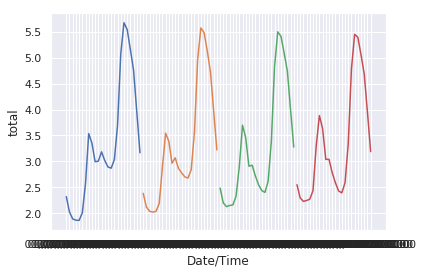

In [250]:
## plotting demand
for day in range(4):
  d= data_el[day*24:(day+1)*24]
  sns.lineplot(x='Date/Time',y='total',data=d)


In [251]:
data_solar = pd.read_csv("solar/modesto_solar_residential_7kw.csv",header=None)
#solar data prep
data_solar.columns=['date','PV']
data_solar.index=[i for i in range(len(data_solar))]
data_solar.drop(index=[i for i in range(9)],inplace=True,axis=0) # drop 0 and 1:8 (UTC)
data_solar.index=[i for i in range(len(data_solar))]
data_solar['PV']=data_solar['PV']/1000
#rescale the 7kW system to our size
system_size=7
# user input:
solar_kW=2
data_solar['PV']=data_solar['PV']*solar_kW/system_size

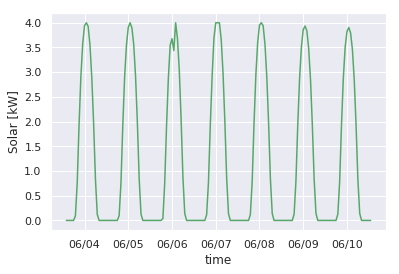

In [252]:
# solar plot 1

fig1 = plt.figure()
plt.plot(range(len(data_solar['PV'][:24*7])),data_solar['PV'][:24*7]*4/2,'g')
rect = fig1.patch
rect.set_facecolor('white')
plt.xlabel('time')
plt.xticks([i*24+10 for i in range(7)],['06/04','06/05','06/06','06/07','06/08','06/09','06/10'])
plt.ylabel('Solar [kW]')
fig1.savefig('solar_1.jpeg', facecolor=fig1.get_facecolor(), edgecolor='none',transparent=True)

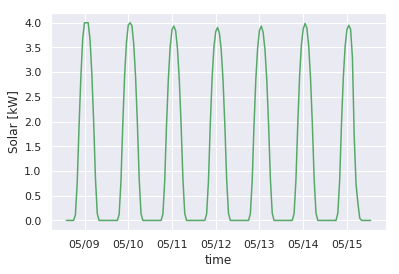

In [253]:
# solar plot 2

fig1 = plt.figure()
plt.plot(range(len(data_solar['PV'][3*24:24*10])),data_solar['PV'][3*24:24*10]*4/2,'g')
rect = fig1.patch
rect.set_facecolor('white')
plt.xlabel('time')
plt.xticks([i*24+10 for i in range(7)],['05/09','05/10','05/11','05/12','05/13','05/14','05/15'])
plt.ylabel('Solar [kW]')
fig1.savefig('solar_2.jpeg', facecolor=fig1.get_facecolor(), edgecolor='none',transparent=True)

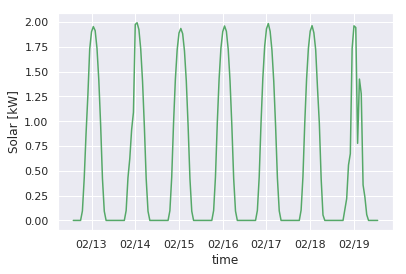

In [254]:
# solar plot 3

fig1 = plt.figure()
plt.plot(range(len(data_solar['PV'][-7*24-9:-9])),data_solar['PV'][-7*24-9:-9],'g')
rect = fig1.patch
rect.set_facecolor('white')
plt.xlabel('time')
plt.xticks([i*24+10 for i in range(7)],['02/13','02/14','02/15','02/16','02/17','02/18','02/19'])
plt.ylabel('Solar [kW]')
fig1.savefig('solar_3.jpeg', facecolor=fig1.get_facecolor(), edgecolor='none',transparent=True)